# Data Mining Project - Phase 5 - Ehsan Espandar - 99442011

<div lang='rtl'>
    با سلام، به دلیل پیشنیاز بودن داده های پیش پردازش شده ی فاز سه و چهار آنها نیز در این نوتبوک آورده شده اند. لطفا به سکشن فاز پنج برای بررسی فایل مراجعه کنید
</div>

In [3]:
import pandas as pd

In [4]:
data_packet = pd.read_csv('housing.csv')

In [5]:
from sklearn.model_selection import train_test_split

X = data_packet.drop('median_house_value', axis=1)
y = data_packet['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

16512 16512
4128 4128


## Phase 4 (It is repeated because phase 5 needs the information of label and prepared data.)

In [6]:
import copy
import pandas as pd

# Assuming X_train and y_train are your feature and target DataFrames respectively
X_train_copy = copy.copy(X_train)
y_train_copy = copy.copy(y_train)

# Concatenate X_train and y_train along columns axis
data = pd.concat([X_train_copy, y_train_copy], axis=1)


print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2782     -114.66     32.74                17.0       1388.0           386.0   
8513     -118.31     33.89                35.0       2144.0           423.0   
2163     -119.82     36.77                41.0       1441.0           274.0   
5232     -118.24     33.94                42.0        380.0           106.0   
9766     -121.66     36.37                 9.0       1580.0           287.0   
...          ...       ...                 ...          ...             ...   
16347    -121.35     38.02                16.0       1665.0           311.0   
20318    -119.15     34.20                25.0       3445.0           898.0   
2669     -115.51     33.24                32.0       1995.0           523.0   
17536    -121.88     37.35                49.0       1728.0           350.0   
6201     -117.89     34.08                25.0       2115.0           489.0   

       population  households  median_income ocean_

In [7]:
label = data["median_house_value"].copy()

data_without_label = data.drop("median_house_value", axis=1)

# Display the copied feature and the dataset without "ocean_proximity"
print("Copied label 'median_house_value':\n", label)
print("\nDataset without 'median_house_value':\n", data_without_label)



Copied label 'median_house_value':
 2782      44000.0
8513     231500.0
2163      71300.0
5232      90000.0
9766     405800.0
           ...   
16347    132300.0
20318    169300.0
2669      43300.0
17536    193000.0
6201     207400.0
Name: median_house_value, Length: 16512, dtype: float64

Dataset without 'median_house_value':
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2782     -114.66     32.74                17.0       1388.0           386.0   
8513     -118.31     33.89                35.0       2144.0           423.0   
2163     -119.82     36.77                41.0       1441.0           274.0   
5232     -118.24     33.94                42.0        380.0           106.0   
9766     -121.66     36.37                 9.0       1580.0           287.0   
...          ...       ...                 ...          ...             ...   
16347    -121.35     38.02                16.0       1665.0           311.0   
20318    -119.15     34.20            

In [8]:
# Create a copy of the "ocean_proximity" feature
ocean_proximity_copy = data_without_label["ocean_proximity"].copy()

# Remove the "ocean_proximity" feature from the original dataset
data_without_ocean_proximity = data_without_label.drop("ocean_proximity", axis=1)

# Display the copied feature and the dataset without "ocean_proximity"
print("Copied feature 'ocean_proximity':\n", ocean_proximity_copy)
print("\nDataset without 'ocean_proximity':\n", data_without_ocean_proximity)


Copied feature 'ocean_proximity':
 2782         INLAND
8513      <1H OCEAN
2163         INLAND
5232      <1H OCEAN
9766      <1H OCEAN
            ...    
16347        INLAND
20318    NEAR OCEAN
2669         INLAND
17536     <1H OCEAN
6201      <1H OCEAN
Name: ocean_proximity, Length: 16512, dtype: object

Dataset without 'ocean_proximity':
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2782     -114.66     32.74                17.0       1388.0           386.0   
8513     -118.31     33.89                35.0       2144.0           423.0   
2163     -119.82     36.77                41.0       1441.0           274.0   
5232     -118.24     33.94                42.0        380.0           106.0   
9766     -121.66     36.37                 9.0       1580.0           287.0   
...          ...       ...                 ...          ...             ...   
16347    -121.35     38.02                16.0       1665.0           311.0   
20318    -119.15     34.

In [9]:
from sklearn.impute import SimpleImputer

#As data has a normal distribution and not heavy amount of outliers then the 'mean' strategy is the method we use to normalize the dataset.

# Selecting only numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Creating a SimpleImputer instance with a chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer on the data and transforming it to fill missing values
data_without_ocean_proximity[numerical_features] = imputer.fit_transform(data_without_ocean_proximity[numerical_features])

print(data_without_ocean_proximity)



       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2782     -114.66     32.74                17.0       1388.0           386.0   
8513     -118.31     33.89                35.0       2144.0           423.0   
2163     -119.82     36.77                41.0       1441.0           274.0   
5232     -118.24     33.94                42.0        380.0           106.0   
9766     -121.66     36.37                 9.0       1580.0           287.0   
...          ...       ...                 ...          ...             ...   
16347    -121.35     38.02                16.0       1665.0           311.0   
20318    -119.15     34.20                25.0       3445.0           898.0   
2669     -115.51     33.24                32.0       1995.0           523.0   
17536    -121.88     37.35                49.0       1728.0           350.0   
6201     -117.89     34.08                25.0       2115.0           489.0   

       population  households  median_income  
2782

In [10]:
imputed_data_df = pd.DataFrame(data_without_ocean_proximity, columns=numerical_features)
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household=x[:,rooms_ix]/x[:,household_ix]
        population_per_household=x[:,population_ix]/x[:,household_ix]
        bedrooms_per_room=x[:,bedrooms_ix]/x[:,rooms_ix]
        return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_room]

custom=CombinedAttributesAdder()
data_custom_tr_top=custom.transform(imputed_data_df.values)
data_custom_tr=pd.DataFrame(data_custom_tr_top)
columns=list(imputed_data_df)
columns.append('rooms_per_household')
columns.append('population_per_household')
columns.append('bedrooms_per_room')
data_custom_tr.columns=columns
data_custom_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-114.66,32.74,17.0,1388.0,386.0,775.0,320.0,1.2049,4.337500,2.421875,0.278098
1,-118.31,33.89,35.0,2144.0,423.0,1192.0,417.0,4.1458,5.141487,2.858513,0.197295
2,-119.82,36.77,41.0,1441.0,274.0,646.0,296.0,3.0568,4.868243,2.182432,0.190146
3,-118.24,33.94,42.0,380.0,106.0,411.0,100.0,0.9705,3.800000,4.110000,0.278947
4,-121.66,36.37,9.0,1580.0,287.0,465.0,208.0,6.1668,7.596154,2.235577,0.181646
5,-121.85,37.36,15.0,3148.0,1116.0,3556.0,1037.0,3.0466,3.035680,3.429122,0.354511
6,-122.49,37.79,52.0,2488.0,281.0,805.0,295.0,10.7058,8.433898,2.728814,0.112942
7,-117.87,33.76,6.0,2992.0,1194.0,3800.0,1130.0,2.2460,2.647788,3.362832,0.399064
8,-118.22,33.88,35.0,998.0,313.0,1335.0,311.0,1.6574,3.209003,4.292605,0.313627
9,-122.20,39.15,33.0,1064.0,174.0,434.0,147.0,3.1250,7.238095,2.952381,0.163534


In [11]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'bedrooms_per_room']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data and transform it to standardize the features
data_custom_tr[numerical_features] = scaler.fit_transform(data_custom_tr[numerical_features])

print(data_custom_tr)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       2.453114 -1.356402           -0.919431    -0.567531       -0.361595   
1       0.630571 -0.818013            0.507393    -0.224185       -0.274180   
2      -0.123413  0.530301            0.983001    -0.543460       -0.626200   
3       0.665524 -0.794605            1.062269    -1.025325       -1.023109   
4      -1.042174  0.343035           -1.553576    -0.480332       -0.595487   
...          ...       ...                 ...          ...             ...   
16507  -0.887383  1.115506           -0.998699    -0.441728       -0.538786   
16508   0.211136 -0.672882           -0.285287     0.366678        0.848031   
16509   2.028686 -1.122320            0.269589    -0.291855       -0.037925   
16510  -1.152026  0.801836            1.617146    -0.413116       -0.446646   
16511   0.840288 -0.729061           -0.285287    -0.237356       -0.118252   

       population  households  median_income  rooms

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'ocean_proximity' column
ocean_proximity_copy = label_encoder.fit_transform(ocean_proximity_copy)
print(ocean_proximity_copy)


[1 0 1 ... 1 0 0]


In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'ocean_proximity_copy' is your encoded column as a NumPy array
ocean_proximity_copy = ocean_proximity_copy.reshape(-1, 1)  # Reshape to a 2D array

# Create a OneHotEncoder
onehot_encoder = OneHotEncoder()

# Fit and transform the specified column using the OneHotEncoder
ocean_proximity_onehot = onehot_encoder.fit_transform(ocean_proximity_copy)

# Extract the dense representation as an array
ocean_proximity_onehot_array = ocean_proximity_onehot.toarray()

# Convert to a DataFrame
ocean_proximity_onehot_df = pd.DataFrame(ocean_proximity_onehot_array, columns=["ocean_proximity_0", "ocean_proximity_1", "ocean_proximity_2", "ocean_proximity_3", "ocean_proximity_4"])

# Find the index of the maximum value along the columns (axis=1)
ocean_proximity_encoded = ocean_proximity_onehot_df.idxmax(axis=1)

# Extract the numeric part from the column names
ocean_proximity_encoded = ocean_proximity_encoded.str.extract(r'(\d+)')

# Rename the column
ocean_proximity_encoded.columns = ["ocean_proximity"]

# Convert the result to integers
ocean_proximity_encoded = ocean_proximity_encoded.astype(int)

# Display the resulting Series
print(ocean_proximity_encoded)


       ocean_proximity
0                    1
1                    0
2                    1
3                    0
4                    0
...                ...
16507                1
16508                4
16509                1
16510                0
16511                0

[16512 rows x 1 columns]


In [14]:
# Assuming 'data_custom_tr' is your original DataFrame and 'ocean_proximity_onehot_df' is the one-hot encoded DataFrame
data_custom_tr = pd.concat([data_custom_tr, ocean_proximity_encoded], axis=1)


# Display the resulting DataFrame
print(data_custom_tr)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       2.453114 -1.356402           -0.919431    -0.567531       -0.361595   
1       0.630571 -0.818013            0.507393    -0.224185       -0.274180   
2      -0.123413  0.530301            0.983001    -0.543460       -0.626200   
3       0.665524 -0.794605            1.062269    -1.025325       -1.023109   
4      -1.042174  0.343035           -1.553576    -0.480332       -0.595487   
...          ...       ...                 ...          ...             ...   
16507  -0.887383  1.115506           -0.998699    -0.441728       -0.538786   
16508   0.211136 -0.672882           -0.285287     0.366678        0.848031   
16509   2.028686 -1.122320            0.269589    -0.291855       -0.037925   
16510  -1.152026  0.801836            1.617146    -0.413116       -0.446646   
16511   0.840288 -0.729061           -0.285287    -0.237356       -0.118252   

       population  households  median_income  rooms

### About pipeline it is not totally clear that what we must do please make it clear whenever you have seen my project answer, thank you.

## Phase 5
### Questions 1,2

In [15]:
from sklearn.linear_model import LinearRegression

X = data_custom_tr
y = label
# Split the data into training and testing sets


# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X, y)

LinearRegression()

### Questions 3,4,5

In [16]:
# Assuming data_prepared is your prepared data
sample_data_prepared = data_custom_tr.iloc[:4, :]  # Selecting the first 4 rows

# Use the linear regression model to predict
L_predictions = lin_reg.predict(sample_data_prepared)

L_sample_labels = y.iloc[:4]
list(L_sample_labels)

[44000.0, 231500.0, 71300.0, 90000.0]

### Questions 6,7

In [17]:
from sklearn.metrics import mean_squared_error
L_housing_predictions=lin_reg.predict(X)
lin_mse = np.square(np.subtract(np.array(y),L_housing_predictions)).mean()
lin_rmse=np.sqrt(lin_mse)
print(f"linear Tree RMSE: {lin_rmse}")


linear Tree RMSE: 69454.74361029781


### Question 8

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
tree_reg = DecisionTreeRegressor()

# Fit the model on the training data
tree_reg.fit(X_train, y_train)

# Assuming data_custom_tr is your prepared data
sample_data_prepared = X_test.iloc[:4, :]  # Selecting the first 4 rows

# Use the Decision Tree Regression model to predict
T_predictions = tree_reg.predict(sample_data_prepared)

# Evaluate the model on the training set
T_housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, T_housing_predictions)
tree_rmse = np.sqrt(tree_mse)

# Print or use the root mean squared error value as needed
print(f"Decision Tree RMSE: {tree_rmse}")


Decision Tree RMSE: 72780.02108126144


### Question 9

In [19]:
from sklearn.model_selection import cross_val_score
T_scores=cross_val_score(tree_reg,X,np.array(y),scoring='neg_mean_squared_error', cv=10)
trees_rmse_scores=np.sqrt(-T_scores)


### Question 10

In [20]:
def display_scores(scores,model_name):
    print("============",model_name,"=========================")
    print("Scores:",scores)#کل ده داده
    print("Mean:",scores.mean())# میانگین
    print('Standard deviation:',scores.std())# انحراف معیار
    print("====================================================")
display_scores(trees_rmse_scores, "Decision Tree Regression")


============ Decision Tree Regression =========================
Scores: [69601.96470792 70727.03045657 67352.76022491 71772.97565048
 72265.81902311 70404.36030193 70784.78837185 71017.54341427
 74179.75421308 70164.47245114]
Mean: 70827.14688152695
Standard deviation: 1686.4973697894231


### Question 11,13

In [21]:
L_scores=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores=np.sqrt(-L_scores)
display_scores(lin_rmse_scores, "linear Regression")


============ linear Regression =========================
Scores: [69927.23336468 70380.65410881 67898.04158651 70646.35477919
 74222.4566409  70954.39141079 67891.34168015 71251.82031486
 68208.64466325 67276.19479395]
Mean: 69865.71333430866
Standard deviation: 2004.6803466748725


<div dir="rtl">
     با توجه به این که هم معیار RMSEوهم معیار اسکور برای روش linear کمتر است میگوییم این روش بهتر است اما با اختلاف بسیار ناچیز و تقریبا می شود گفت هر دو روشی نتیجه مشابهی میدهند..
</div>

### Question 12

<div dir="rtl">
    باید بر اساس انجام پیشبینی بر روی دو مجموعه تست و آموزش برای هر روش منحنی یادگیری آن را رسم کرده سپس نتیجه گیری کنیم :
</div>

Decision Tree - RMSE (Train): 0.0
Decision Tree - RMSE (Test): 72508.08466463501
Linear Regression - RMSE (Train): 69553.62345113074
Linear Regression - RMSE (Test): 69397.71073724094


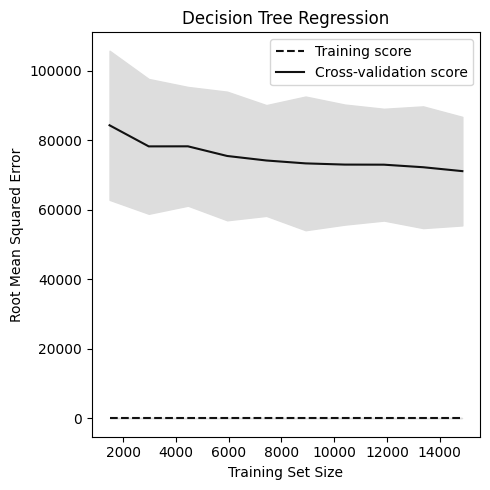

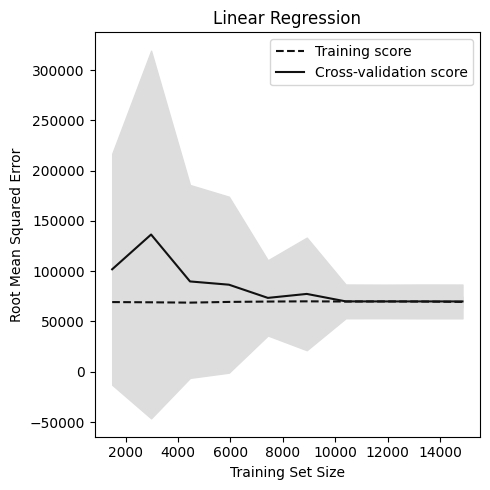

In [22]:

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
tree_reg.fit(X_train, y_train)

# Train Linear Regression
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

# Decision Tree evaluation
train_predictions_dt = tree_reg.predict(X_train)
test_predictions_dt = tree_reg.predict(X_test)

rmse_train_dt = np.sqrt(mean_squared_error(y_train, train_predictions_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, test_predictions_dt))

# Linear Regression evaluation
train_predictions_lr = lin_reg.predict(X_train)
test_predictions_lr = lin_reg.predict(X_test)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, train_predictions_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, test_predictions_lr))

print("Decision Tree - RMSE (Train):", rmse_train_dt)
print("Decision Tree - RMSE (Test):", rmse_test_dt)

print("Linear Regression - RMSE (Train):", rmse_train_lr)
print("Linear Regression - RMSE (Test):", rmse_test_lr)

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Example code for learning curves
def plot_learning_curves(name,model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error', cv=10)

    train_mean = np.sqrt(-np.mean(train_scores, axis=1))
    train_std = np.sqrt(np.std(train_scores, axis=1))
    test_mean = np.sqrt(-np.mean(test_scores, axis=1))
    test_std = np.sqrt(np.std(test_scores, axis=1))

    plt.figure(figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title(name)
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Assuming tree_reg and lin_reg are your trained models
plot_learning_curves('Decision Tree Regression',tree_reg, X, y)
plot_learning_curves('Linear Regression',lin_reg, X, y)

<div dir="rtl">
    با توجه به نمودار های بالا واضح است که decision tree regression بر روی مجموعه آموزشی بسیار دقیق است اما در مجموعه تست خطای زیادی دارد. این درحالی است که linear regression بر روی هر دو مجموعه خطا دارد که نهایتا نمودار های آن دو همگرا می شوند. پس decision tree regression دارای overfitting است درحالی که linear regression دارای underfitting می باشد.
</div>

### Question 14

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor()

# Fit the model on the training data
forest_reg.fit(X_train, y_train)

# Assuming data_prepared is your prepared data
sample_data_prepared = X_train.iloc[:4, :]  # Selecting the first 4 rows

# Use the Random Forest Regressor to predict
forest_predictions = forest_reg.predict(sample_data_prepared)

# Calculate RMSE for the entire training set
forest_mse = mean_squared_error(y_train, forest_reg.predict(X_train))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest RMSE on Training Set:", forest_rmse)

# Cross-validation scores
F_scores = cross_val_score(forest_reg, X, y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-F_scores)
display_scores(forest_rmse_scores, "Random Forest Regression")


Random Forest RMSE on Training Set: 19136.14228743269
============ Random Forest Regression =========================
Scores: [49352.00690156 51634.27230654 48334.70219697 52534.75125285
 51800.49631462 48783.67549765 50471.69943599 51530.65627014
 49663.12164111 48313.20311421]
Mean: 50241.85849316363
Standard deviation: 1481.532261505701
